#OPENCV

##Importar librerias 

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

##Importar archivos

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Extraer canal

In [0]:
img = cv2.imread('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/imagen1.jpg')
if img.size == 0:
  print("Error: the image has not been correctly loaded.")
else:
  print('Image Dimension : ',img.shape)
  print ("height: ",str(img.shape[0]), ", width: ", img.shape[1], " Numbers of channels:", img.shape[2])
  processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/image1_gray.jpg', processed_image)
  
  #extract RED channel
  red_channel = img[:,:,2]
  #extract green channel
  green_channel = img[:,:,1]
  #extract blue channel
  blue_channel = img[:,:,0]
  
  #create images
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/image1_red_channel.jpg', red_channel)
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/image1_green_channel.jpg', green_channel)
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/image1_blue_channel.jpg', blue_channel)


Image Dimension :  (1146, 1504, 3)
height:  1146 , width:  1504  Numbers of channels: 3


##Resaltar color

In [0]:

img = cv2.imread('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/test.jpg')
if img.size == 0:
  print("Error: the image has not been correctly loaded.")
else:
  print('Image Dimension : ',img.shape)
  print ("height: ",str(img.shape[0]), ", width: ", img.shape[1], " Numbers of channels:", img.shape[2])
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #separate channels
  copy = img
  #highlighting color
  for x in range(0,img.shape[0]):
    for y in range(0,img.shape[1]):
      b=int(copy[:,:,0][x,y])
      g=int(copy[:,:,1][x,y])
      r=int(copy[:,:,2][x,y])
      d1=abs(b-r)
      d2=abs(r-g)
      #d3=abs(b-g) 
      max_delta = 55
      if(
          (d1<max_delta 
         or d2<max_delta 
         #or d3<max_delta)
          )
         ):
        #copy[:,:,0][x,y] = 0
        #copy[:,:,1][x,y] = 0
        copy[:,:,2][x,y] = 0
  copy[:,:,0] = [[0 for n in range(0,img.shape[1])] for j in range(0,img.shape[0])]
  copy[:,:,1] = [[0 for n in range(0,img.shape[1])] for j in range(0,img.shape[0])]
  #copy[:,:,2] = [[0 for n in range(0,img.shape[1])] for j in range(0,img.shape[0])]
  #to rgb and blend
  gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
  mixed = cv2.addWeighted(gray_image, 0.5, copy, 0.5, 0)
  #create images
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/test_selective_red.jpg', mixed)

Image Dimension :  (400, 700, 3)
height:  400 , width:  700  Numbers of channels: 3


##HSV

Image Dimension :  (1146, 1504, 3)
height:  1146 , width:  1504  Numbers of channels: 3


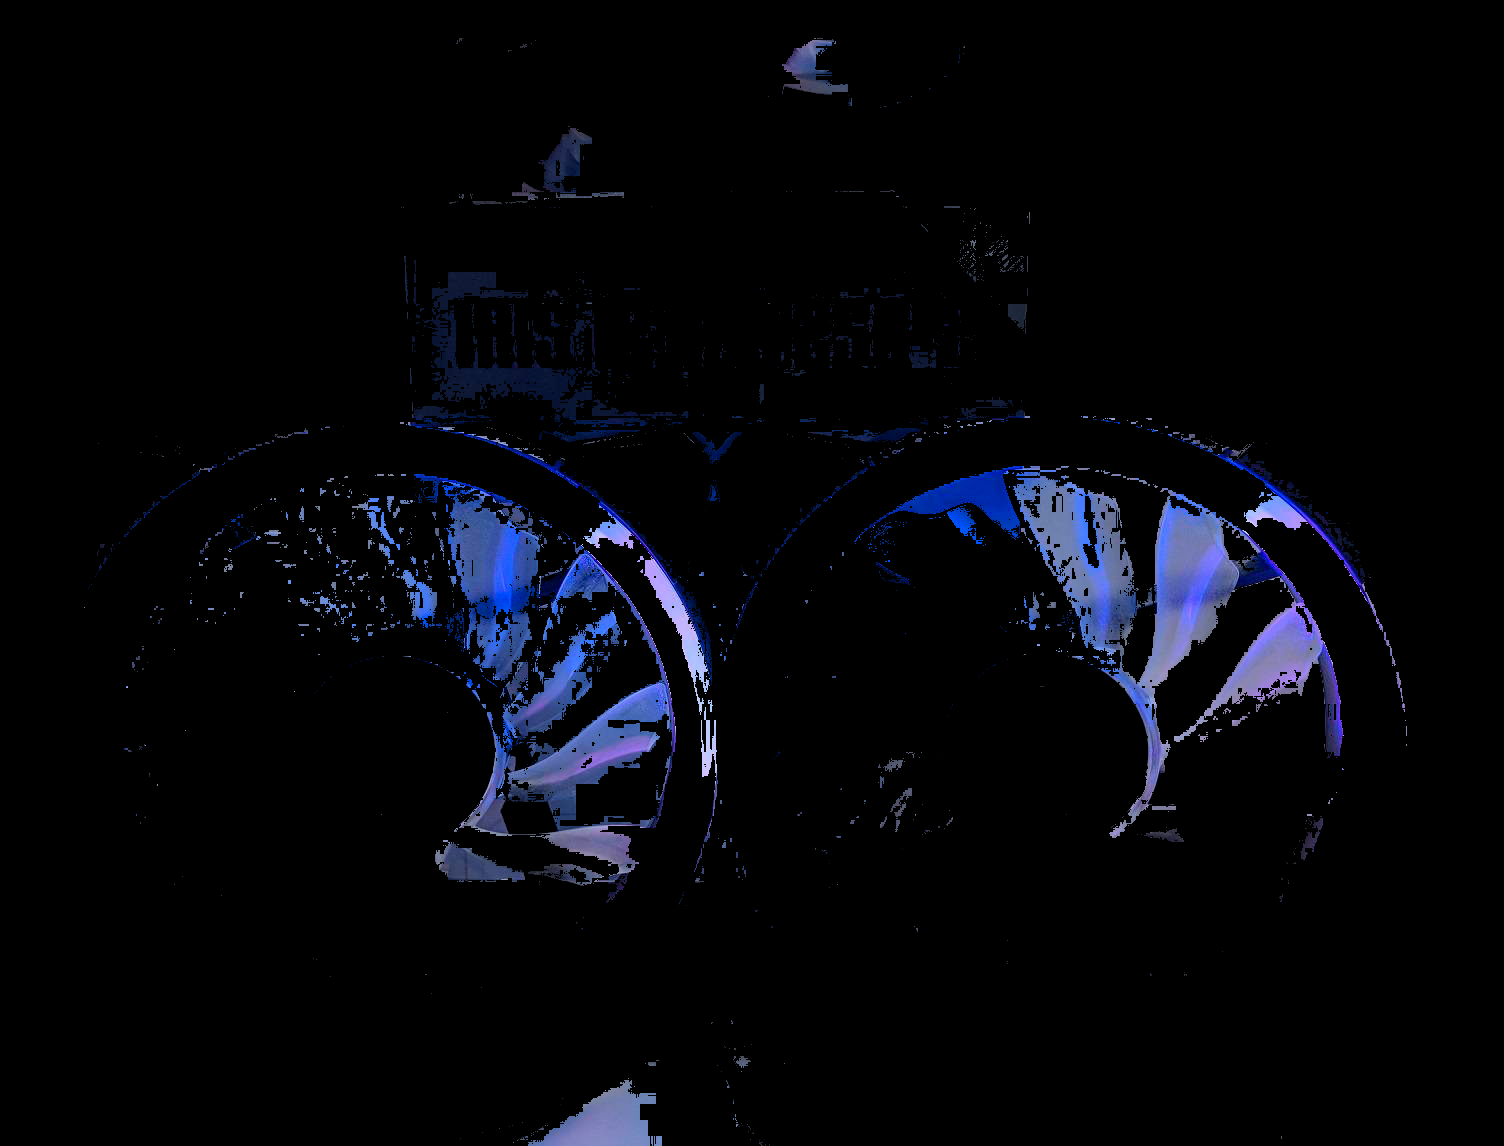

In [0]:
img = cv2.imread('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/imagen1.jpg')
if img.size == 0:
  print("Error: the image has not been correctly loaded.")
else:
  print('Image Dimension : ',img.shape)
  print ("height: ",str(img.shape[0]), ", width: ", img.shape[1], " Numbers of channels:", img.shape[2])
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  lower_blue = np.array([110,50,50]) # B,G,R
  upper_blue = np.array([130,255,255])
  mask_blue = cv2.inRange(hsv, lower_blue, upper_blue) #creamos la mascara
  img_result = cv2.bitwise_and(img,img, mask= mask_blue) #aplicamos la mascara
  #cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/processed_image_mask_red.png', img_result)

  cv2_imshow(img_result)

##Gradiente

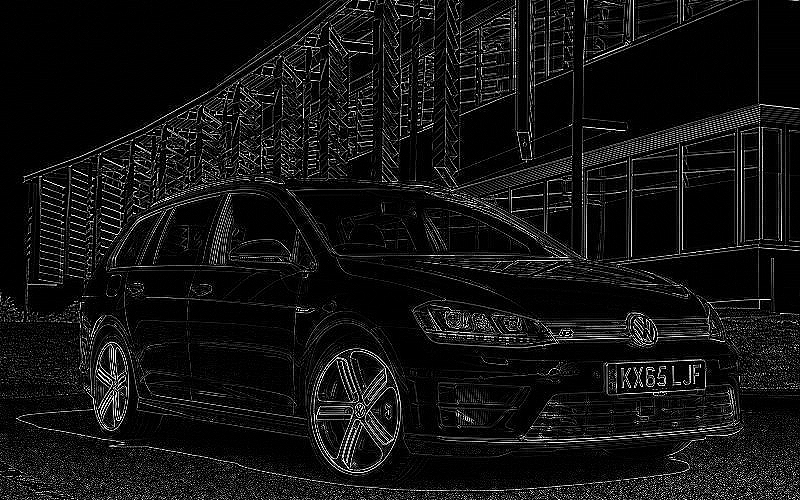

In [0]:
# 0: regresa una matriz de grises.
img = cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/imagen2.jpg",0)

#cambiar CV_64F por CV_8U, si quiere verlo en negro/blanco
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

cv2_imshow(laplacian)
#cv2_imshow(sobelx)
#cv2_imshow(sobely)

##Gradiente mejorado

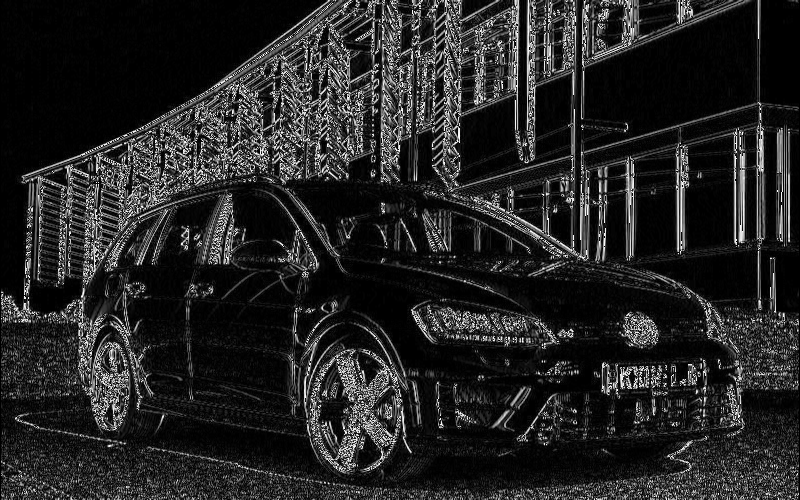

In [0]:
# 0: regresa una matriz de grises.
img = cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/imagen2.jpg",0)
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)

#Utilizando cv2.CV_64F. Luego toma el valor absoluto y hace la conversión a cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
cv2_imshow(sobel_8u)

#cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/images/cebra_solbex.jpg', sobel_8u)

##Detector de bordes Canny

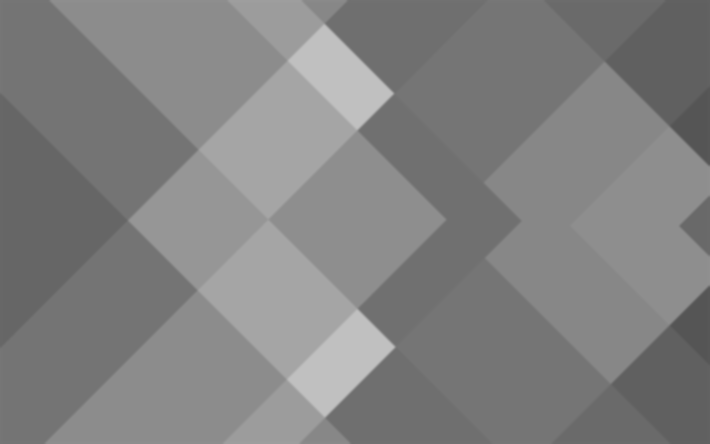

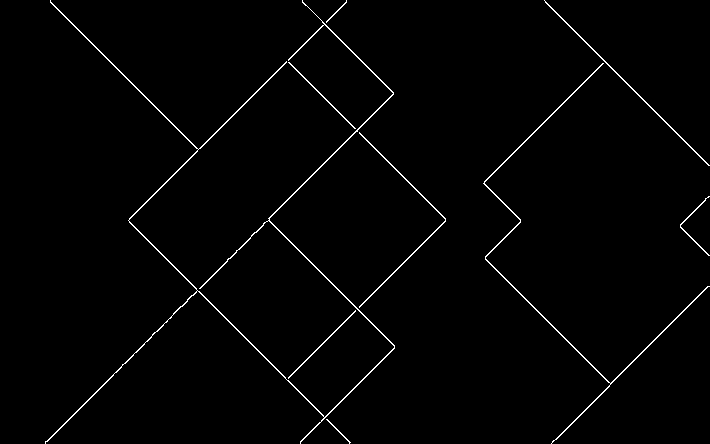

He encontrado 9 objetos


In [0]:
# 0: regresa una matriz de grises.

# 1. Escala de grises
img_gray = cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/imagenes/geo.png",0)

# 2. Filtro Gauss
img_gauss = cv2.GaussianBlur(img_gray, (5,5), 0)

# 3. Canny
img_canny = cv2.Canny(img_gauss, 20, 80)

cv2_imshow(img_gauss)
cv2_imshow(img_canny)

_ ,contornos,_ = cv2.findContours(img_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("He encontrado {} objetos".format(len(contornos)))

#Ejecutar PY

In [0]:
!python '/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/NinoOrtiz_RicardoAndres/python_files/crear_bordes_Ricardo.py'

He encontrado 9 objetos
